In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import xgboost as xgb

In [3]:
import pandas as pd 
data = pd.read_csv('wa_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(data.isnull().sum())
print(data['Churn'].value_counts())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [6]:
# Data Simulation
np.random.seed(42)
n_customers = 1000
data = {
    'CustomerID': range(1, n_customers + 1),
    'Tenure': np.random.randint(1, 72, n_customers),
    'MonthlyCharges': np.random.uniform(20, 120, n_customers),
    'TotalCharges': np.random.uniform(100, 8000, n_customers),
    'ContractType': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_customers),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_customers),
    'SupportTickets': np.random.randint(0, 10, n_customers),
    'ChurnStatus': np.random.choice([0, 1], n_customers, p=[0.7, 0.3])
}
df = pd.DataFrame(data)

In [7]:
#Encode categorical variables
label_encoders = {}
for column in ['ContractType', 'PaymentMethod']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
#Feature Scaling
scaler = StandardScaler()
numerical_features = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'SupportTickets']
df[numerical_features] = scaler.fit_transform(df[numerical_features])   

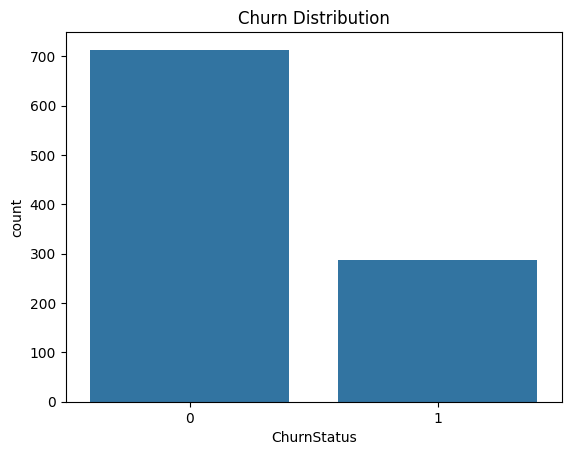

In [18]:
#Data visualization 

import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='ChurnStatus', data=data)
plt.title("Churn Distribution")
plt.show()

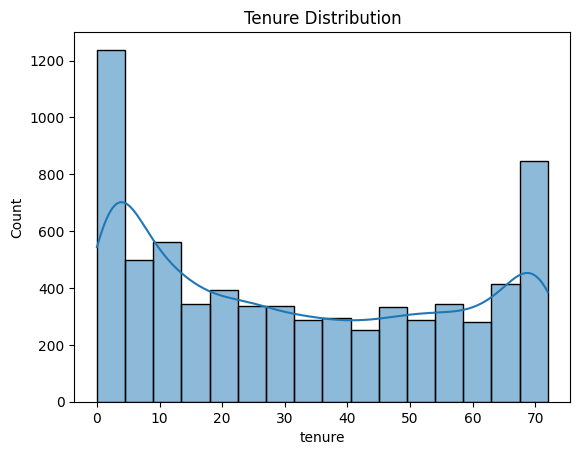

In [ ]:
sns.histplot(data['tenure'], kde=True)
plt.title("Tenure Distribution")
plt.show()

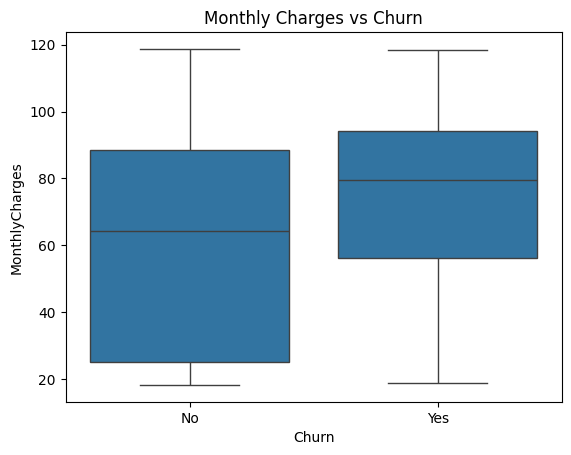

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()

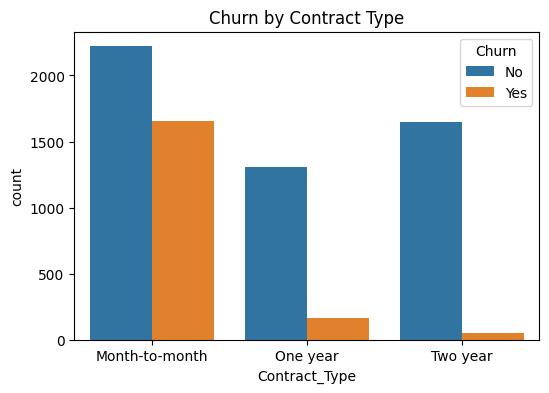

In [ ]:
df = data.copy()
plt.figure(figsize=(6,4))
df["Contract_Type"] = df["Contract"]
sns.countplot(x="Contract_Type", hue="Churn", data=df)
plt.title("Churn by Contract Type")
plt.show()

In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Contract_Type'],
      dtype='object')

In [26]:
#prepocessing
# Ensure 'CustomerID' exists before dropping
if 'CustomerID' in data.columns:
    data = data.drop(['CustomerID'], axis=1)

for col in data.columns:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

X = data.drop('ChurnStatus', axis=1)
y = data['ChurnStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])



In [46]:
#Feature Engineering

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
print("\nMissing values after conversion:\n", 'TotalCharges:', data['TotalCharges'].isnull().sum())

data['AverageMonthlyCharges'] = data['TotalCharges'] / (data['Tenure'] + 1)
print("\nAverage Monthly Charges created. Sample values:\n", data['AverageMonthlyCharges'].head())

data['ContractRiskScore'] = data['ContractType'] * data['AverageMonthlyCharges']
print("\nContract Risk Score created. Sample values:\n", data['ContractRiskScore'].head())

data['SupportTicketsPerMonth'] = data['SupportTickets'] / (data['Tenure'] + 1)
print("\nSupport Tickets Per Month created. Sample values:\n", data['SupportTicketsPerMonth'].head())

                                                            



Missing values after conversion:
 TotalCharges: 0

Average Monthly Charges created. Sample values:
 0     61.732172
1    401.285041
2     27.610992
3    203.871414
4    235.650530
Name: AverageMonthlyCharges, dtype: float64

Contract Risk Score created. Sample values:
 0     61.732172
1      0.000000
2     27.610992
3    407.742827
4    235.650530
Name: ContractRiskScore, dtype: float64

Support Tickets Per Month created. Sample values:
 0    0.113208
1    0.250000
2    0.048387
3    0.272727
4    0.360000
Name: SupportTicketsPerMonth, dtype: float64


In [47]:
#Model Training& Prediction

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall:", recall_score(y_test, y_pred))
print("Random Forest F1 Score:", f1_score(y_test, y_pred))
model = RandomForestClassifier(n_estimators=100, random_state=42)


Random Forest Accuracy: 0.705
Random Forest Precision: 0.3888888888888889
Random Forest Recall: 0.12727272727272726
Random Forest F1 Score: 0.1917808219178082


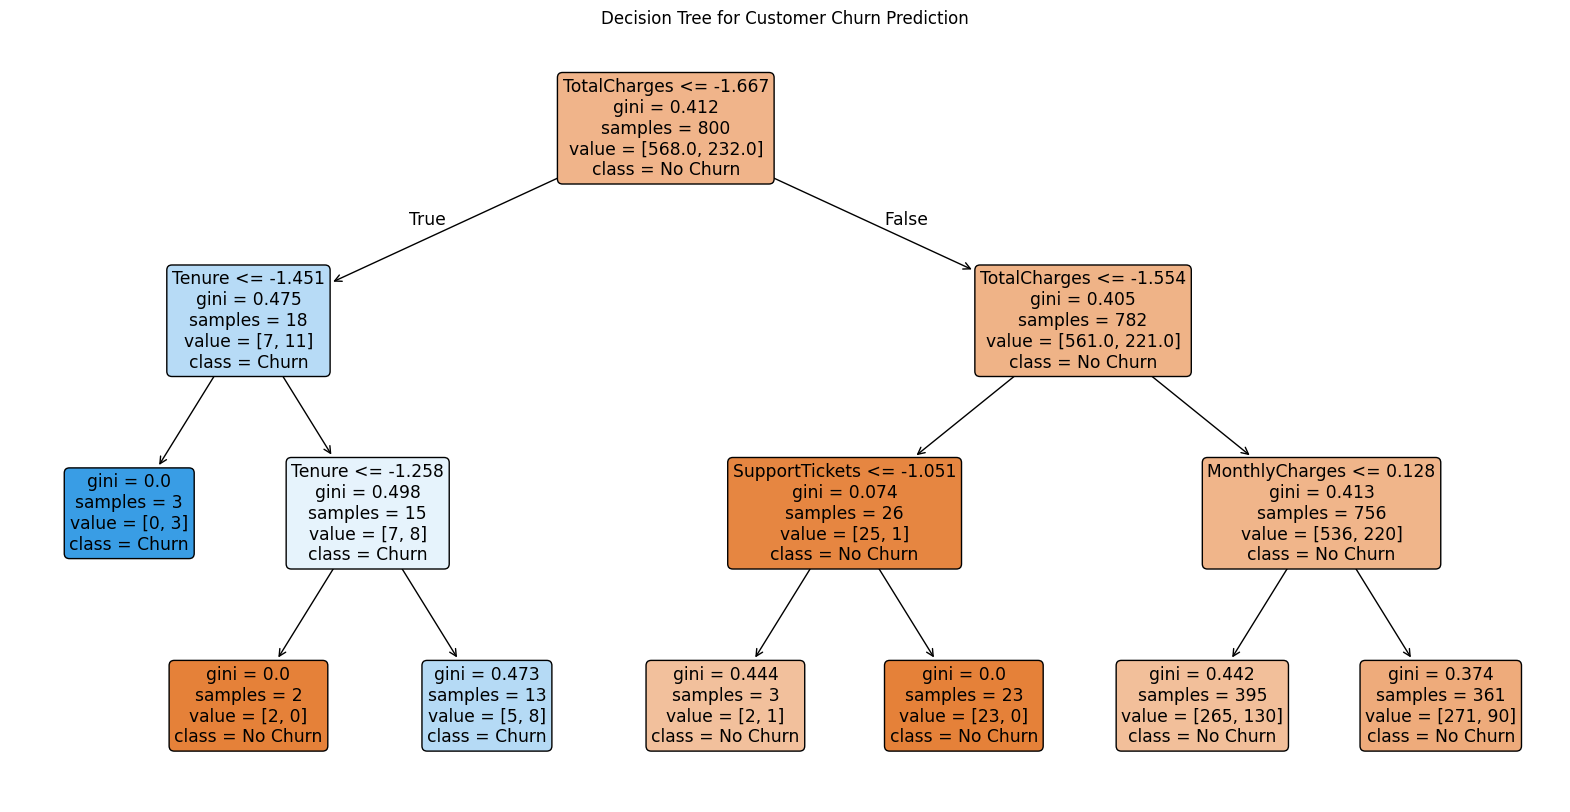

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=3,        # keep small for visualization
    random_state=42
)

dt_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
from sklearn import tree
import matplotlib.pyplot as plt

tree.plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No Churn', 'Churn'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Customer Churn Prediction")
plt.show()



Logistic Regression Accuracy: 0.725
Logistic Regression Precision: 0.0
Logistic Regression Recall: 0.0
Logistic Regression F1 Score: 0.0


c:\Users\BaDeshah\Desktop\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


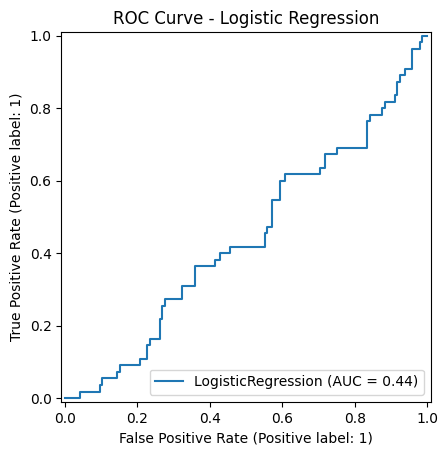

In [57]:
#Logistic Regression & Prediction
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_log_pred = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_log_pred))
print("Logistic Regression Precision:", precision_score(y_test, y_log_pred))        
print("Logistic Regression Recall:", recall_score(y_test, y_log_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, y_log_pred))

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(log_model, X_test, y_test)
plt.title("ROC Curve - Logistic Regression")
plt.show()


XGBoost Accuracy: 0.7856635911994322
XGBoost Precision: 0.6092307692307692
XGBoost Recall: 0.5308310991957105
XGBoost F1 Score: 0.5673352435530086


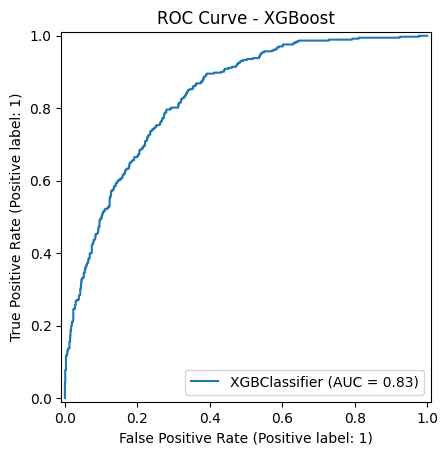

In [ ]:
# XGBoost Classifier & prediction

import xgboost as xgb   
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_xgb_pred))
print("XGBoost Precision:", precision_score(y_test, y_xgb_pred))
print("XGBoost Recall:", recall_score(y_test, y_xgb_pred))
print("XGBoost F1 Score:", f1_score(y_test, y_xgb_pred))

RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
plt.title("ROC Curve - XGBoost")
plt.show()


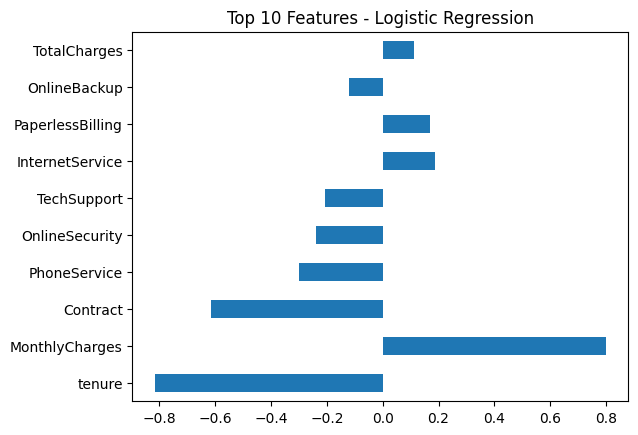

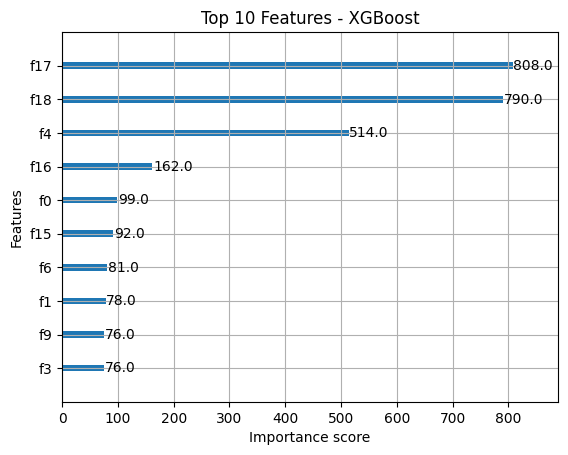

In [ ]:
#logistic regression(feature importance)
import numpy as np

coef = pd.Series(log_model.coef_[0], index=X.columns)
coef_sorted = coef.sort_values(key=abs, ascending=False)[:10]  # top 10 features
coef_sorted.plot(kind='barh')
plt.title("Top 10 Features - Logistic Regression")
plt.show()

#XGBoost(feature importance)
xgb.plot_importance(xgb_model, max_num_features=10)
plt.title("Top 10 Features - XGBoost")
plt.show()

In [ ]:
#Evaluation & Comparison
results = pd.DataFrame({   
    'Model': ['Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_log_pred), accuracy_score(y_test, y_xgb_pred)],
    'Precision': [precision_score(y_test, y_pred), precision_score(y_test, y_log_pred), precision_score(y_test, y_xgb_pred)],
    'Recall': [recall_score(y_test, y_pred), recall_score(y_test, y_log_pred), recall_score(y_test, y_xgb_pred)],
    'F1 Score': [f1_score(y_test, y_pred), f1_score(y_test, y_log_pred), f1_score(y_test, y_xgb_pred)]
})  
print("\nModel Performance Comparison:\n", results)



Model Performance Comparison:
                  Model  Accuracy  Precision    Recall  F1 Score
0        Random Forest  0.799858   0.667897  0.485255  0.562112
1  Logistic Regression  0.816891   0.687296  0.565684  0.620588
2              XGBoost  0.785664   0.609231  0.530831  0.567335


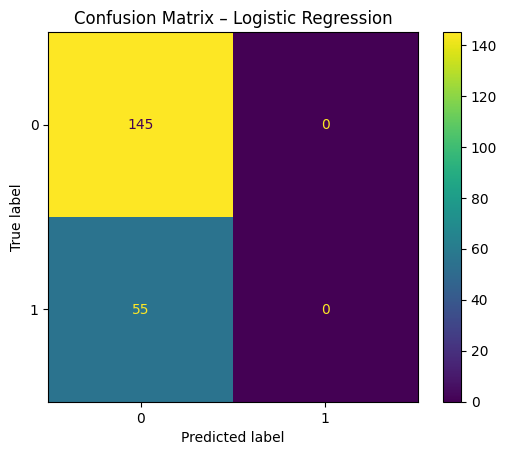

In [59]:
#Confusion Matrix for Logistic Regression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = log_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

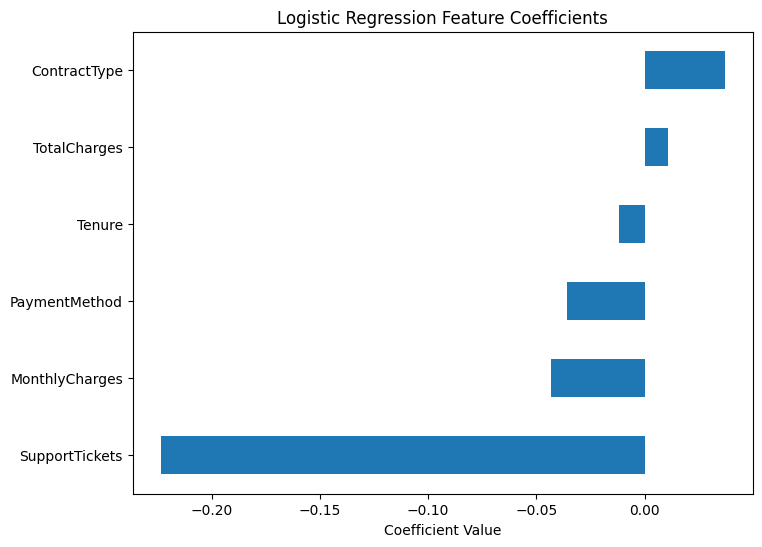

In [ ]:
#Feature importance for Logistic Regression
import pandas as pd
import matplotlib.pyplot as plt

coefficients = pd.Series(
    log_model.coef_[0],
    index=X.columns
).sort_values()

coefficients.plot(kind='barh', figsize=(8,6))
plt.title("Logistic Regression Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.show()


In [73]:
print(type(model))


<class 'sklearn.ensemble._forest.RandomForestClassifier'>


SHAP can be used with tree-based models like Random Forest, but for simplicity and stability, feature importance was used to explain the model. and SHAP was giving error of model and estimator.